In [2]:
##script OK
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re
from io import StringIO
import os
from os.path import basename, splitext
#from pathlib import Path
import seaborn as sns
import numpy as np

In [ ]:
#récupérer la matrice de confusion pour chaque texte
# aller chercher les valeurs pour chaque texte
# ploter : point : texte avec valeurs accuracy 
# x = lieu
# y = date

In [3]:
#fonction de récupération des matrices des fichiers .md
def get_sections(s):
    for sec in s.split('## '):
        yield sec if sec.startswith('## ') else '## '+sec

In [4]:
#fonction de production des donnnées sous forme de tableau propre
def prod_DF(texteT,titre):
    dfGlobalDataLoc = pd.DataFrame(columns=['accuracy', 'precision', 'recall','support','label'])
    for i,sec in enumerate(get_sections(texteT)):
        if i == 0:
            pass
        else:
            print(i,sec)
            sec2 = re.sub('##.*', '', sec)
            currentVal = re.search('##\s*(\w*)\n', sec).group(1)
            df = pd.read_csv(StringIO(sec2.replace(' ', '')), sep='|',index_col=1).dropna(axis=1,how='all').iloc[1:]
            df.insert(4,"deaf",titre,True)
            df.insert(5,"label",currentVal,True)
            dfGlobalDataLoc = dfGlobalDataLoc.append(df)
    print(dfGlobalDataLoc)        
    return dfGlobalDataLoc

In [5]:
#df : bien vider avant boucle
dfGlobalData = pd.DataFrame(columns=['accuracy', 'precision', 'recall','support','label'])

In [6]:
#boucle sur directory avec application de la fonction et production d'un tableau avec les data
#basepath = 'tableursParVal/deaf/'
###variation pour data tidy/tidyLex
basepath = 'tableursParVal/deaf/tidyLex/'
####
for entry in os.listdir(basepath):
    #if entry.endswith('Confusion.md'):
    ###variation pour data tidy
    if entry.endswith('ConfusionTidyLex.md'):
    ####    
        fullPath = basepath + entry
        with open(fullPath, 'r') as f:
            texteT = f.read()
            print(f)
            t = splitext(basename(fullPath))[0]
            #titre = t.partition(".tsv")[0]
            ###variation pour data tidy
            titre = t.partition("TidyLex.tsv")[0]
            ###
            dfGlobalDataLoc = prod_DF(texteT,titre)
            dfGlobalData = dfGlobalData.append(dfGlobalDataLoc)

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/PercLo_LTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.5974   | 0.3005    | 0.3186 | 77      |
| known-tokens     | 0.5974   | 0.3005    | 0.3186 | 77      |
| ambiguous-tokens | 0.4706   | 0.4524    | 0.3878 | 17      |


                 accuracy precision  recall support label      deaf
all                0.5974    0.3005  0.3186      77   POS  PercLo_L
known-tokens       0.5974    0.3005  0.3186      77   POS  PercLo_L
ambiguous-tokens   0.4706    0.4524  0.3878      17   POS  PercLo_L
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/Aiol1_2NTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all        

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/SBernAn2STidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7805   | 0.6389    | 0.6389 | 41      |
| known-tokens     | 0.7805   | 0.6389    | 0.6389 | 41      |
| ambiguous-tokens | 0.75     | 0.3333    | 0.3333 | 4       |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 5       |


                 accuracy precision  recall support  label       deaf
all                0.7805    0.6389  0.6389      41  lemma  SBernAn2S
known-tokens       0.7805    0.6389  0.6389      41  lemma  SBernAn2S
ambiguous-tokens     0.75    0.3333  0.3333       4  lemma  SBernAn2S
unknown-targets       0.0       0.0     0.0       5  lemma  SBernAn2S
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ChastVergiS_ATidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 

                 accuracy precision  recall support label       deaf
all                0.7143    0.3704  0.3556      42   POS  BestGervM
known-tokens       0.7143    0.3704  0.3556      42   POS  BestGervM
ambiguous-tokens      0.6    0.5556  0.5333      10   POS  BestGervM
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MarieFab_LTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6866   | 0.2796    | 0.3161 | 67      |
| known-tokens     | 0.6866   | 0.2796    | 0.3161 | 67      |
| ambiguous-tokens | 0.2222   | 0.1429    | 0.1429 | 9       |


                 accuracy precision  recall support label        deaf
all                0.6866    0.2796  0.3161      67   POS  MarieFab_L
known-tokens       0.6866    0.2796  0.3161      67   POS  MarieFab_L
ambiguous-tokens   0.2222    0.1429  0.1429       9   POS  Ma

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MarieEquitS_HTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9302   | 0.8485    | 0.8333 | 43      |
| known-tokens     | 0.9302   | 0.8485    | 0.8333 | 43      |
| ambiguous-tokens | 0.6667   | 0.5       | 0.5    | 6       |


                 accuracy precision  recall support  label           deaf
all                0.9302    0.8485  0.8333      43  lemma  MarieEquitS_H
known-tokens       0.9302    0.8485  0.8333      43  lemma  MarieEquitS_H
ambiguous-tokens   0.6667       0.5     0.5       6  lemma  MarieEquitS_H
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MarieLanvR2_PTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-------

                 accuracy precision  recall support  label        deaf
all                 0.825    0.6667  0.6667      40  lemma  BodelNicH2
known-tokens        0.825    0.6667  0.6667      40  lemma  BodelNicH2
ambiguous-tokens   0.8333    0.7143  0.7143       6  lemma  BodelNicH2
unknown-targets       0.0       0.0     0.0       1  lemma  BodelNicH2
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/CharroiSch_B2*TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7273   | 0.56      | 0.56   | 44      |
| known-tokens     | 0.7273   | 0.56      | 0.56   | 44      |
| ambiguous-tokens | 0.25     | 0.1429    | 0.1429 | 4       |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 6       |


                 accuracy precision  recall support  label            deaf
all                0.7273      0.56    0.56   

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/JMeunAbC*TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8529   | 0.7197    | 0.7273 | 68      |
| known-tokens     | 0.8529   | 0.7197    | 0.7273 | 68      |
| ambiguous-tokens | 0.6667   | 0.5       | 0.5    | 3       |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 8       |


                 accuracy precision  recall support  label       deaf
all                0.8529    0.7197  0.7273      68  lemma  JMeunAbC*
known-tokens       0.8529    0.7197  0.7273      68  lemma  JMeunAbC*
ambiguous-tokens   0.6667       0.5     0.5       3  lemma  JMeunAbC*
unknown-targets       0.0       0.0     0.0       8  lemma  JMeunAbC*
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/PercLo_PTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## PO

                 accuracy precision  recall support label                 deaf
all                0.5977    0.2584  0.2662     174   POS  EvratGenABo_trans1*
known-tokens       0.5977    0.2584  0.2662     174   POS  EvratGenABo_trans1*
ambiguous-tokens   0.5676    0.3186  0.3567      37   POS  EvratGenABo_trans1*
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/PerNeslesTabJTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7      | 0.5833    | 0.625  | 10      |
| known-tokens     | 0.7      | 0.5833    | 0.625  | 10      |
| ambiguous-tokens | 0.5      | 0.5       | 0.25   | 2       |


                 accuracy precision recall support label           deaf
all                   0.7    0.5833  0.625      10   POS  PerNeslesTabJ
known-tokens          0.7    0.5833  0.625      10   POS  PerNeslesTabJ
ambiguous-to

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MarieMil_STidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.7273   | 0.4667    | 0.5373 | 33      |
| known-tokens     | 0.7273   | 0.4667    | 0.5373 | 33      |
| ambiguous-tokens | 0.2857   | 0.1429    | 0.2857 | 7       |


                 accuracy precision  recall support label        deaf
all                0.7273    0.4667  0.5373      33   POS  MarieMil_S
known-tokens       0.7273    0.4667  0.5373      33   POS  MarieMil_S
ambiguous-tokens   0.2857    0.1429  0.2857       7   POS  MarieMil_S
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/ContPerc4Lo_ATidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| 

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/CharroiSch_C*TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8725   | 0.7733    | 0.7791 | 102     |
| known-tokens     | 0.8725   | 0.7733    | 0.7791 | 102     |
| ambiguous-tokens | 0.5      | 0.3333    | 0.3333 | 14      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 2       |


                 accuracy precision  recall support  label           deaf
all                0.8725    0.7733  0.7791     102  lemma  CharroiSch_C*
known-tokens       0.8725    0.7733  0.7791     102  lemma  CharroiSch_C*
ambiguous-tokens      0.5    0.3333  0.3333      14  lemma  CharroiSch_C*
unknown-targets       0.0       0.0     0.0       2  lemma  CharroiSch_C*
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/RenNouvRTidyLex.tsv-POSConfusionTidyLex.md' mode='r' e

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/CharroiSch_A2*TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8194   | 0.6967    | 0.6842 | 144     |
| known-tokens     | 0.8194   | 0.6967    | 0.6842 | 144     |
| ambiguous-tokens | 0.4348   | 0.3333    | 0.3167 | 23      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 2       |


                 accuracy precision  recall support  label            deaf
all                0.8194    0.6967  0.6842     144  lemma  CharroiSch_A2*
known-tokens       0.8194    0.6967  0.6842     144  lemma  CharroiSch_A2*
ambiguous-tokens   0.4348    0.3333  0.3167      23  lemma  CharroiSch_A2*
unknown-targets       0.0       0.0     0.0       2  lemma  CharroiSch_A2*
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/AlexArsLTidyLex.tsv-POSConfusionTidyLex.md' mode

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/RutebTheophFTidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8029   | 0.5964    | 0.6094 | 137     |
| known-tokens     | 0.8029   | 0.5964    | 0.6094 | 137     |
| ambiguous-tokens | 0.75     | 0.4583    | 0.5    | 24      |
| unknown-targets  | 0.0      | 0.0       | 0.0    | 12      |


                 accuracy precision  recall support  label          deaf
all                0.8029    0.5964  0.6094     137  lemma  RutebTheophF
known-tokens       0.8029    0.5964  0.6094     137  lemma  RutebTheophF
ambiguous-tokens     0.75    0.4583     0.5      24  lemma  RutebTheophF
unknown-targets       0.0       0.0     0.0      12  lemma  RutebTheophF
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/BestPierre1MTidyLex.tsv-POSConfusionTidyLex.md' mode='r' enc

<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/AngVieGregMTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.6774   | 0.4218    | 0.3893 | 31      |
| known-tokens     | 0.6774   | 0.4218    | 0.3893 | 31      |
| ambiguous-tokens | 0.0      | 0.0       | 0.0    | 1       |


                 accuracy precision  recall support label         deaf
all                0.6774    0.4218  0.3893      31   POS  AngVieGregM
known-tokens       0.6774    0.4218  0.3893      31   POS  AngVieGregM
ambiguous-tokens      0.0       0.0     0.0       1   POS  AngVieGregM
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/MarieEquitS_HTidyLex.tsv-POSConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|--------

                 accuracy precision  recall support label  deaf
all                0.7087    0.2509  0.2795     127   POS  Rois
known-tokens       0.7087    0.2509  0.2795     127   POS  Rois
ambiguous-tokens      0.5    0.3929  0.4167      16   POS  Rois
<_io.TextIOWrapper name='tableursParVal/deaf/tidyLex/CharroiSch_B1*TidyLex.tsv-LemmaConfusionTidyLex.md' mode='r' encoding='UTF-8'>
1 ## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9111   | 0.8108    | 0.8108 | 45      |
| known-tokens     | 0.9111   | 0.8108    | 0.8108 | 45      |
| ambiguous-tokens | 0.75     | 0.625     | 0.625  | 8       |


                 accuracy precision  recall support  label            deaf
all                0.9111    0.8108  0.8108      45  lemma  CharroiSch_B1*
known-tokens       0.9111    0.8108  0.8108      45  lemma  CharroiSch_B1*
ambiguous-tokens     0.75     0.625   0.625       8  lemma

In [7]:
dfGlobalData
dfGlobalAll = dfGlobalData.loc['all']

#sélection des colonnes pour la modélisation
dfGA= dfGlobalAll[['accuracy','support','label','deaf']]
dfGA

,accuracy,support,label,deaf
all,0.5974,77,POS,PercLo_L
all,0.7742,31,lemma,Aiol1_2N
all,0.6765,34,POS,PercLo_Q
all,0.8889,36,POS,PeanGatS1_3
all,0.9487,39,lemma,ChastPereAM
...,...,...,...,...
all,0.6944,36,POS,SCathGuiT
all,0.7636,55,POS,MerlinM
all,0.7218,133,POS,FillePonth1B2
all,0.65,40,POS,BodelNicH2


In [8]:
dfMD = pd.read_csv('../Nouveau_corpus/metadataRevuSansSpace_Genres.tsv', delimiter='\t')
dfMD

FileNotFoundError: [Errno 2] No such file or directory: '../Nouveau_corpus/metadataRevuSansSpace_Genres.tsv'

In [9]:
#on arrange nos données
dfMD = dfMD.replace(to_replace='Aiol1/2N', value='Aiol1_2N')
dfMD = dfMD.replace(to_replace='YvainLo*;PercLo*', value='YvainLo*_PercLo*')
#dfMD = dfMD.replace(to_replace='PenitAdam1/2Q', value='PenitAdam1_2Q')


NameError: name 'dfMD' is not defined

In [56]:
# on merge
dfFull = pd.merge(dfMD,dfGA, on='deaf')
dfFull


,deaf,titreDees,genre,vers,lieuComposition,dateComposition,lieuManuscrit,dateManuscrit,qualite,lieuCompositionType,dateCompositionType,lieuManuscritType,dateManuscritType,genreType,rmques,accuracy,support,label
0,Perclo_R,nil,nil,oui,champ. mérid.,1180ca,pic.,1237pm13,ms1,champ,2emxiie,pic,1emxiiie,roman,-,0.6806,72,POS
1,Perclo_R,nil,nil,oui,champ. mérid.,1180ca,pic.,1237pm13,ms1,champ,2emxiie,pic,1emxiiie,roman,-,0.9028,72,lemma
2,AdHaleRobS*,"Li Gieus de Robin et Marion, ms. P",jeu,oui,art.,1285ca,Arras,1295,ms,pic,2emxiiie,pic,2emxiiie,theatre,-,0.8438,32,lemma
3,AdHaleRobS*,"Li Gieus de Robin et Marion, ms. P",jeu,oui,art.,1285ca,Arras,1295,ms,pic,2emxiiie,pic,2emxiiie,theatre,-,0.7188,32,POS
4,PercLo_U,"Le Perceval de Chrétien de Troyes, ms. U, v. 1...",roman arthurien,oui,champ. mérid.,1180ca,Paris,1330ca,ms1,champ,2emxiie,idf,1emxive,roman,-,0.7317,82,POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,CharroiSch_D*,"Le charroi de Nimes, ms. D",nil,oui,nil,1150pm20,lorr. mérid.,1275pm25,ms1,nil,mxiie,lorr,2emxiiie,chgeste,-,0.6512,43,POS
296,MarieFab_B,nil,fable,oui,Nord-Ouest,1180ca,agn.,1290pm10,ms,ouest,2emxiie,agn,2emxiiie,narrbref,-,0.7857,42,lemma
297,MarieFab_B,nil,fable,oui,Nord-Ouest,1180ca,agn.,1290pm10,ms,ouest,2emxiie,agn,2emxiiie,narrbref,-,0.6905,42,POS
298,ChastVergiS_K,"La chastelaine de Vergi, ms. K",conte courtois en octosyllabes,oui,norm.,1240ca,pic.,1350pm10,ms1,ouest,1emxiiie,pic,mxive,narrbref,-,0.7021,47,POS


In [63]:
#sélection label : si besoin
dfFull = dfFull[dfFull["label"]== "lemma"]
dfFull

,deaf,titreDees,genre,vers,lieuComposition,dateComposition,lieuManuscrit,dateManuscrit,qualite,lieuCompositionType,dateCompositionType,lieuManuscritType,dateManuscritType,genreType,rmques,accuracy,support,label
1,Perclo_R,nil,nil,oui,champ. mérid.,1180ca,pic.,1237pm13,ms1,champ,2emxiie,pic,1emxiiie,roman,-,0.9028,72,lemma
2,AdHaleRobS*,"Li Gieus de Robin et Marion, ms. P",jeu,oui,art.,1285ca,Arras,1295,ms,pic,2emxiiie,pic,2emxiiie,theatre,-,0.8438,32,lemma
5,PercLo_U,"Le Perceval de Chrétien de Troyes, ms. U, v. 1...",roman arthurien,oui,champ. mérid.,1180ca,Paris,1330ca,ms1,champ,2emxiie,idf,1emxive,roman,-,0.9390,82,lemma
7,FetRomF1,"Li fet des Romains, p. 5-31, ms. V",roman antique (basé sur Lucain),non,frc.,1213ca,bourg.,1290pm10,cr1,bourgfrc,1emxiiie,bourgfrc,2emxiiie,hist,-,0.8548,62,lemma
8,SEust2P,"La vie de Saint Eustache, ms. M",vie de saint en octosyllabes,oui,norm.,1210pm10,norm.,1250ca,ms2,ouest,1emxiiie,ouest,mxiiie,hagio,-,0.7500,72,lemma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,BenTroieC,"[PVR] Le roman de Troie par B. de ste-Maure, v...",roman épique,oui,poit.,1170ca,agn.,1210pm10,cr3,centre,2emxiie,agn,1emxiiie,hist,-,0.8375,80,lemma
293,RenNouvR,"Renart le Nouvel par Jacquemart Gielee, v. 1-3026",roman en vers,oui,Lille,1290ca,Arras,1295,ms,pic,2emxiiie,pic,2emxiiie,roman,-,0.9091,33,lemma
294,CharroiSch_D*,"Le charroi de Nimes, ms. D",nil,oui,nil,1150pm20,lorr. mérid.,1275pm25,ms1,nil,mxiie,lorr,2emxiiie,chgeste,-,0.7209,43,lemma
296,MarieFab_B,nil,fable,oui,Nord-Ouest,1180ca,agn.,1290pm10,ms,ouest,2emxiie,agn,2emxiiie,narrbref,-,0.7857,42,lemma


In [64]:
dfFull['accuracy'] = dfFull['accuracy'].astype(float) 
#dfFull['accuracy'].round(decimals = 3)

In [65]:
cat_typeCompo = pd.CategoricalDtype(categories = ["nil", "1emxiie", "mxiie", "2emxiie", "1emxiiie", "mxiiie","2emxiiie","1emxive","2emxive"], ordered=True)
cat_typeMs = pd.CategoricalDtype(categories = ["nil", "1emxiie", "mxiie", "2emxiie", "1emxiiie", "mxiiie","2emxiiie","1emxive","2emxive"], ordered=True)

dfFull['dateCompositionType'] = dfFull['dateCompositionType'].astype(cat_typeCompo)
dfFull['dateManuscritType'] = dfFull['dateManuscritType'].astype(cat_typeMs)
#dfFullOrder = dfFull.sort_values("dateComposition")
#dfFull.sort_values(by=['dateComposition'], key=lambda x: x.map(custom_dict))

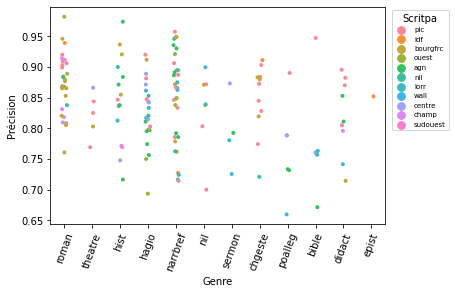

In [156]:
### scatterplot
plt.xticks(rotation=70)

gfg = sns.stripplot(data = dfFull, x="genreType", y="accuracy", hue="lieuManuscritType", jitter=True, size=4)
gfg.legend(fontsize=7,bbox_to_anchor= (1.2,1),title="Scripta")
plt.xlabel('Genre')
plt.ylabel('Précision')

plt.savefig('visualisationsv2/scatterplots/tidyLex/LemmaAccGenreLieuMS.png', dpi=300, transparent=False,bbox_inches='tight') 


In [3]:
# Démo
flights = sns.load_dataset("flights")
df = flights.pivot("month", "year", "passengers")
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


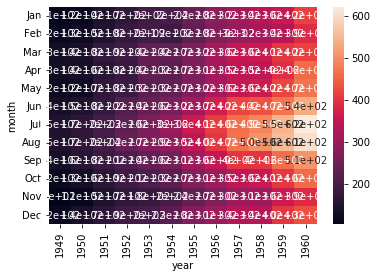

In [35]:
# df.loc[(df.sum(axis=1) > 4000), (df.sum(axis=0) > 4000)]
sns.heatmap(df, annot=True)

In [36]:
df = dfFull.pivot("genreType", "lieuManuscritType", "accuracy")
# on restreint aux classes d'effectif au moins 5, et on trace
sns.heatmap(df.loc[(df.sum(axis=1) > 4), (df.sum(axis=0) > 4)], annot=True)

NameError: name 'dfFull' is not defined

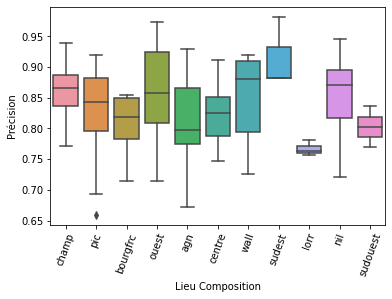

In [155]:
##boxplot
plt.xticks(rotation=70)

sns.boxplot(x = 'lieuCompositionType', y = 'accuracy', data = dfFull) 

plt.xlabel('Lieu Composition')
plt.ylabel('Précision')

plt.savefig('visualisationsv2/boxplots/tidyLex/LemmaAccLieuCompoBP.png', dpi=300, transparent=False,bbox_inches='tight')

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model = ols('accuracy ~ genreType', data=dfFull).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(year),1.772585e+06,11.0,74.51503,4.358672e-51
Residual,2.854594e+05,132.0,NaN,NaN


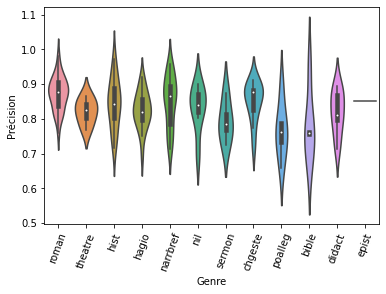

In [67]:
##violinplots
##pq donne au-dessus de 1 ?

plt.xticks(rotation=70)

sns.violinplot(x = 'genreType', y = 'accuracy', data = dfFull) 

plt.xlabel('Genre')
plt.ylabel('Précision')

plt.savefig('visualisationsv2/violinplots/tidyLex/LemmaAccGenreVP.png', dpi=300, transparent=False,bbox_inches='tight')

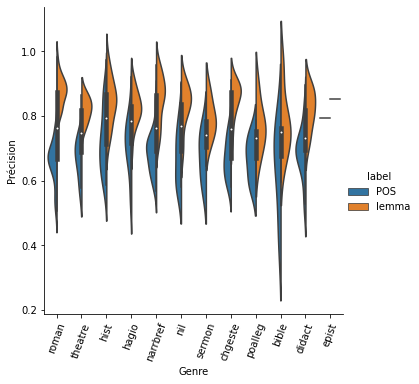

In [55]:
#violinPlot lemma et POS


sns.catplot(y="accuracy",x="genreType",

                hue="label",

                data=dfFull, kind="violin", split=True)

plt.xlabel('Genre')
plt.ylabel('Précision')
plt.xticks(rotation=70)

              #  height=8, aspect=.7)
plt.savefig('visualisationsv2/violinplots/tidyLex/POSLemmaAccGenreVP.png', dpi=300, transparent=False,bbox_inches='tight')    

/home/lucence/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/lucence/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



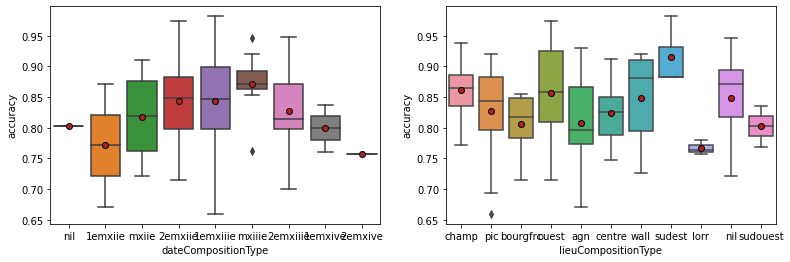

In [72]:
##boxplot date et scripta
plt.figure(figsize=(13,4)) 
plt.subplot(1,2,1)
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'} 
sns.boxplot('dateCompositionType','accuracy',data=dfFull, showmeans=True, meanprops=meanprops) 
plt.subplot(1,2,2) 
sns.boxplot('lieuCompositionType','accuracy',data=dfFull, showmeans=True, meanprops=meanprops) 
plt.show()